In [2]:
import lbg

testdata = [(-1.5, 2.0, 5.0),
            (-2.0, -2.0, 0.0),
            (1.0, 1.0, 2.0),
            (1.5, 1.5, 1.2),
            (1.0, 2.0, 5.6),
            (1.0, -2.0, -2.0),
            (1.0, -3.0, -2.0),
            (1.0, -2.5, -4.5)]

for cb_size in (1, 2, 4, 8):
    print('generating codebook for size', cb_size)
    cb, cb_abs_w, cb_rel_w = lbg.generate_codebook(testdata, cb_size)
    print('output:')
    for i, c in enumerate(cb):
        print('> %s, abs_weight=%d, rel_weight=%f' % (c, cb_abs_w[i], cb_rel_w[i]))

generating codebook for size 1
output:
> [0.375, -0.375, 0.6624999999999999], abs_weight=8, rel_weight=1.000000
generating codebook for size 2
output:
> [0.5, 1.625, 3.4499999999999997], abs_weight=4, rel_weight=0.500000
> [0.25, -2.375, -2.125], abs_weight=4, rel_weight=0.500000
generating codebook for size 4
output:
> [-0.25, 2.0, 5.3], abs_weight=2, rel_weight=0.250000
> [1.25, 1.25, 1.6], abs_weight=2, rel_weight=0.250000
> [1.0, -2.5, -2.833333333333333], abs_weight=3, rel_weight=0.375000
> [-2.0, -2.0, 0.0], abs_weight=1, rel_weight=0.125000
generating codebook for size 8
output:
> [1.0, 2.0, 5.6], abs_weight=1, rel_weight=0.125000
> [-1.5, 2.0, 5.0], abs_weight=1, rel_weight=0.125000
> [1.0, 1.0, 2.0], abs_weight=1, rel_weight=0.125000
> [1.5, 1.5, 1.2], abs_weight=1, rel_weight=0.125000
> [1.0, -2.5, -4.5], abs_weight=1, rel_weight=0.125000
> [1.0, -2.5, -2.0], abs_weight=2, rel_weight=0.250000
> [-2.00002, -2.00002, 0.0], abs_weight=0, rel_weight=0.000000
> [-2.0, -2.0, 0.0], 

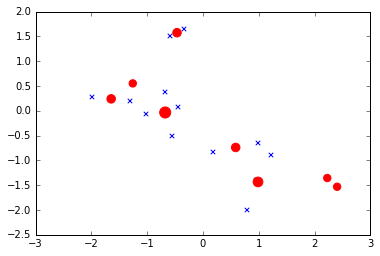

In [32]:
import random
import matplotlib.pyplot as plt

import lbg

%matplotlib inline

N = 16
SIZE_CODEBOOK = 8

random.seed(0)
population = [(random.gauss(0, 1), random.gauss(0, 1))
              for _ in range(N)]

plt.scatter([p[0] for p in population], [p[1] for p in population], marker='x', color='blue')

cb, cb_abs_w, cb_rel_w = lbg.generate_codebook(population, SIZE_CODEBOOK)
plt.scatter([p[0] for p in cb], [p[1] for p in cb], s=[((w+1) ** 5) * 40 for w in cb_rel_w], marker='o', color='red')
